# TITANIC

Students will be separated into two groups & able to truly practice their skills, emphasizing on visualization & modeling with machine learning, with a live Kaggle competition. During this time working with others, students will also be encouraged to identify the gaps in their skills, especially in analysis & modeling, in the project & review as much as possible moving forward to other projects in the continual sessions.

### We use classifcation models for questions with yes-no answers.
#### Metrics;
* accuracy
* precision
* recall
* f1-score
* confusion matrix

#### Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_csv("ttrain.csv")
df_test = pd.read_csv("ttest.csv")
df_train['source'] = 'train'
df_test['source'] = 'test'
df = pd.concat([df_train, df_test], ignore_index=True)


### EDA - Exploratory Data Analysis

In [3]:
df.isnull().sum()


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
source            0
dtype: int64

In [4]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

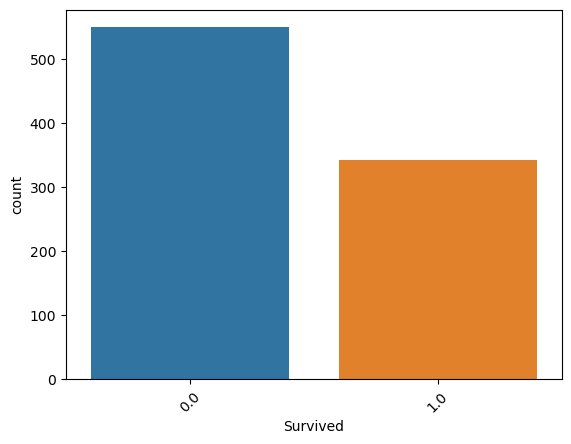

In [5]:
sns.countplot(x=df['Survived'])
plt.xticks(rotation=45);

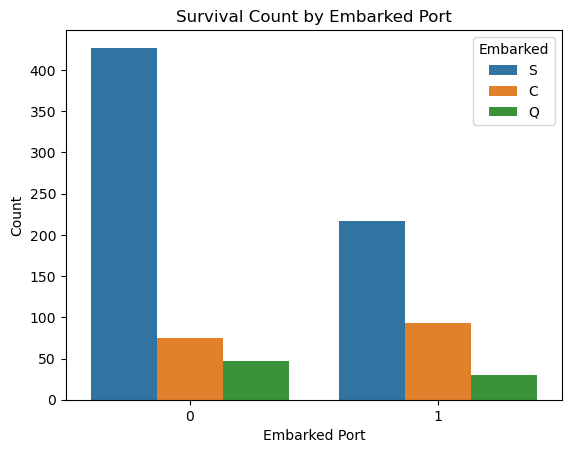

In [6]:
sns.countplot(x='Survived', hue='Embarked', data=df_train)
plt.title('Survival Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()

### Feature Engineering

In [7]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)


In [8]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked','Pclass'], drop_first=True)

In [9]:
df.isnull().sum()

Survived      418
Age             0
SibSp           0
Parch           0
Fare            0
source          0
Sex_male        0
Embarked_Q      0
Embarked_S      0
Pclass_2        0
Pclass_3        0
dtype: int64

In [10]:
df.sample(10)

,Survived,Age,SibSp,Parch,Fare,source,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
1192,NaN,29.881138,0,0,15.0458,test,True,False,False,True,False
175,0.0,18.000000,1,1,7.8542,train,True,False,True,False,True
742,1.0,21.000000,2,2,262.3750,train,False,False,False,False,False
45,0.0,29.881138,0,0,8.0500,train,True,False,True,False,True
684,0.0,60.000000,1,1,39.0000,train,True,False,True,True,False
1189,NaN,30.000000,0,0,45.5000,test,True,False,True,False,False
781,1.0,17.000000,1,0,57.0000,train,False,False,True,False,False
492,0.0,55.000000,0,0,30.5000,train,True,False,True,False,False
1295,NaN,43.000000,1,0,27.7208,test,True,False,False,False,False
111,0.0,14.500000,1,0,14.4542,train,False,False,False,False,True


In [11]:
df_train = df[df['source'] == 'train'].drop(columns=['source'])
df_test = df[df['source'] == 'test'].drop(columns=['Survived', 'source'])

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 891 to 1308
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        418 non-null    float64
 4   Sex_male    418 non-null    bool   
 5   Embarked_Q  418 non-null    bool   
 6   Embarked_S  418 non-null    bool   
 7   Pclass_2    418 non-null    bool   
 8   Pclass_3    418 non-null    bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 18.4 KB


### Modelling

In [13]:
x = df_train.drop(columns=['Survived'])
y = df_train['Survived']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        gnb=GaussianNB()
        bnb=BernoulliNB()
        lr=LogisticRegression()
        dt=DecisionTreeClassifier()
        rf=RandomForestClassifier()
        gbc=GradientBoostingClassifier()
        knc=KNeighborsClassifier()
        

       
        
        algos=[gnb,bnb,lr,dt,rf,gbc,knc]
        algo_names=['GaussianNB','BernoulliNB','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        confusion_matrixes= []
        classification_reports= []
        accuracy_scores=[]        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            classification_reports.append(classification_report(p , y_test))
            confusion_matrixes.append(confusion_matrix(p , y_test))
            accuracy_scores.append(accuracy_score(p , y_test))

        for i in range(len(algo_names)):
            print('Algoritma:',algo_names[i])
            print('Confusion Matrix:',confusion_matrixes[i])
            print('Classification Report:',classification_reports[i])
            print('Accuracy Score:',accuracy_scores[i])
            print('************************************************************')
        
        
       

In [16]:
algo_test(x,y)

Algoritma: GaussianNB
Confusion Matrix: [[83 20]
 [22 54]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       103
         1.0       0.73      0.71      0.72        76

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.76      0.77      0.76       179

Accuracy Score: 0.7653631284916201
************************************************************
Algoritma: BernoulliNB
Confusion Matrix: [[89 24]
 [16 50]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.85      0.79      0.82       113
         1.0       0.68      0.76      0.71        66

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Accuracy Score: 0.776536312849162
***************************************************

In [17]:
gbc = GradientBoostingClassifier()
gbc.fit(x, y)

GradientBoostingClassifier()

In [20]:
pred = gbc.predict(df_test)
pred  = pd.DataFrame(pred, columns=['Survived'])

In [21]:
pred.to_csv('submission.csv', index=False)

In [23]:
pred.sample(20)

,Survived
376,0.0
314,1.0
188,0.0
343,1.0
319,0.0
266,0.0
90,0.0
189,0.0
145,0.0
14,1.0


In [24]:
pred.value_counts()

Survived
0.0         284
1.0         134
Name: count, dtype: int64